In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sys
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
# set attack column in each attack csv file
path = "/content/drive/MyDrive/MQTT_final/tranalyzer_csv_files/"
file_names = ["attack1_flows.csv","attack3_flows.csv","attack4_flows.csv","attack5_flows.csv","attack6_flows.csv","attack8_flows.csv"]
for file in file_names:
  df = pd.read_csv(path + file)
  print(file)
  attack = []
  for value in df['srcIP']:
    # print(value, value.split('.'))
    if value.split('.')[0] == '157':
      attack.append(1)
    else:
      attack.append(0)
  df['attack'] = attack
  # print(df.head())
  df.to_csv(path + 'modif_' + file, index = False)

attack1_flows.csv
attack3_flows.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (102,104,106) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


attack4_flows.csv
attack5_flows.csv
attack6_flows.csv
attack8_flows.csv


In [ ]:
# combine all flow files into a single dataframe
path = "/content/drive/MyDrive/MQTT_final/tranalyzer_csv_files/"
file_names = ["modif_attack1_flows.csv","modif_attack3_flows.csv","modif_attack4_flows.csv","modif_attack5_flows.csv","modif_attack6_flows.csv","modif_attack8_flows.csv"]
main_df = pd.DataFrame()
attack_type = 1
for file in file_names:
  attack = []
  curr_dataframe = pd.read_csv(path+file)
  #iterate over all rows in curr data frame and add an extra column to the data frame, whose value = attack_type if last column value is 1 else 0
  for value in curr_dataframe["attack"]:
    if value == 0:
      attack.append(0)
    elif value == 1:
      attack.append(attack_type)
  curr_dataframe["attack_type"] = attack
  attack_type = attack_type+1
  main_df = main_df.append(curr_dataframe,ignore_index = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (102,104,106) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
main_df.shape
print(main_df.columns)

Index(['%dir', 'flowInd', 'flowStat', 'timeFirst', 'timeLast', 'duration',
       'numHdrDesc', 'numHdrs', 'hdrDesc', 'srcMac',
       ...
       'mqttClientID', 'mqttConAck', 'mqttTopic', 'connSip', 'connDip',
       'connSipDip', 'connSipDprt', 'connF', 'attack', 'attack_type'],
      dtype='object', length=114)


In [ ]:
main_df.info()
cols = main_df.columns
for col in cols:
  print(col, end = ',')
  if col == 'dstPort' or col == 'minIAT' or col == 'ip6OptHH_D' or col == 'tcpMaxWinSz' or col == 'tcpTmS' or col == 'icmpStat' or col == 'connDip':
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243030 entries, 0 to 243029
Columns: 114 entries, %dir to attack_type
dtypes: float64(24), int64(53), object(37)
memory usage: 211.4+ MB
%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,dstMac,ethType,srcIP,srcIPCC,srcIPOrg,srcPort,dstIP,dstIPCC,dstIPOrg,dstPort,

l4Proto,macStat,macPairs,srcMac_dstMac_numP,dstPortClassN,dstPortClass,numPktsSnt,numPktsRcvd,numBytesSnt,numBytesRcvd,minPktSz,maxPktSz,avePktSize,stdPktSize,minIAT,

maxIAT,aveIAT,stdIAT,pktps,bytps,pktAsm,bytAsm,tcpFStat,ipMindIPID,ipMaxdIPID,ipMinTTL,ipMaxTTL,ipTTLChg,ipToS,ipFlags,ipOptCnt,ipOptCpCl_Num,ip6OptCntHH_D,ip6OptHH_D,

tcpISeqN,tcpPSeqCnt,tcpSeqSntBytes,tcpSeqFaultCnt,tcpPAckCnt,tcpFlwLssAckRcvdBytes,tcpAckFaultCnt,tcpBFlgtMx,tcpInitWinSz,tcpAveWinSz,tcpMinWinSz,tcpMaxWinSz,

tcpWinSzDwnCnt,tcpWinSzUpCnt,tcpWinSzChgDirCnt,tcpWinSzThRt,tcpFlags,tcpAnomaly,tcpOptPktCnt,tcpOptCnt,tcpOptions,tcpMSS,tcpWS,tcpMPTBF,tcpMPF,tcpMPAID,t

In [ ]:
print(main_df['attack'].unique())
print(main_df['attack_type'].value_counts())

[0 1]
0    133840
3    100494
4      2488
5      1963
6      1626
1      1481
2      1138
Name: attack_type, dtype: int64


In [ ]:
main_df.head()

,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,mqttClientID,mqttConAck,mqttTopic,connSip,connDip,connSipDip,connSipDprt,connF,attack,attack_type
0,A,4,0x0400000000004000,1.643436e+09,1.643436e+09,0.067943,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,NaN,0x00,NaN,1,3,4,4,4.0,0,0
1,B,4,0x0400000000004001,1.643436e+09,1.643436e+09,0.000093,1,3,eth:ipv4:tcp,42:01:0a:b6:00:03,...,NaN,0x00,NaN,3,1,3,3,1.0,0,0
2,A,6,0x0400000000004000,1.643436e+09,1.643436e+09,0.030442,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,NaN,0x00,NaN,1,3,4,4,4.0,0,0
3,B,6,0x0400000000004001,1.643436e+09,1.643436e+09,0.000068,1,3,eth:ipv4:tcp,42:01:0a:b6:00:03,...,NaN,0x00,NaN,3,1,3,3,1.0,0,0
4,A,7,0x0400000000004000,1.643436e+09,1.643436e+09,1.065499,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,B80MJZHREG,0x00,test,1,3,4,4,4.0,0,0


In [ ]:
nunique = main_df.nunique()
cols_to_drop = nunique[nunique == 1].index
main_df.drop(cols_to_drop, axis=1, inplace = True)
print(main_df.shape)
print(main_df.columns)

(243030, 98)
Index(['%dir', 'flowInd', 'flowStat', 'timeFirst', 'timeLast', 'duration',
       'numHdrs', 'hdrDesc', 'srcMac', 'dstMac', 'ethType', 'srcIP', 'srcIPCC',
       'srcIPOrg', 'srcPort', 'dstIP', 'dstIPCC', 'dstIPOrg', 'dstPort',
       'l4Proto', 'srcMac_dstMac_numP', 'dstPortClassN', 'dstPortClass',
       'numPktsSnt', 'numPktsRcvd', 'numBytesSnt', 'numBytesRcvd', 'minPktSz',
       'maxPktSz', 'avePktSize', 'stdPktSize', 'maxIAT', 'aveIAT', 'stdIAT',
       'pktps', 'bytps', 'pktAsm', 'bytAsm', 'tcpFStat', 'ipMindIPID',
       'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 'ipTTLChg', 'ipToS', 'ipFlags',
       'tcpISeqN', 'tcpPSeqCnt', 'tcpSeqSntBytes', 'tcpSeqFaultCnt',
       'tcpPAckCnt', 'tcpFlwLssAckRcvdBytes', 'tcpAckFaultCnt', 'tcpBFlgtMx',
       'tcpInitWinSz', 'tcpAveWinSz', 'tcpMinWinSz', 'tcpMaxWinSz',
       'tcpWinSzDwnCnt', 'tcpWinSzUpCnt', 'tcpWinSzChgDirCnt', 'tcpFlags',
       'tcpAnomaly', 'tcpOptPktCnt', 'tcpOptCnt', 'tcpOptions', 'tcpMSS',
       'tcpWS', 't

In [ ]:
cols_to_drop = ['connSip','connDip','connSipDip','connSipDprt','connF','timeFirst','timeLast','tcpBtm','tcpUtm','tcpTmER','tcpTmS','flowInd','hdrDesc','srcMac','dstMac','srcIP','srcIPCC','srcIPOrg','srcPort','dstIP','dstIPCC','dstIPOrg','dstPort','srcMac_dstMac_numP','dstPortClass','tcpISeqN','mqttClientID','mqttTopic','icmpBFTypH_TypL_Code']
print(len(cols_to_drop))

29


In [ ]:
main_df.drop(cols_to_drop, axis = 1, inplace = True)
main_df.shape

(243030, 69)

In [ ]:
main_df.head(10)

,%dir,flowStat,duration,numHdrs,ethType,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,tcpStatesAFlags,icmpStat,icmpTCcnt,icmpEchoSuccRatio,mqttStat,mqttCPT,mqttProtoLevel,mqttConAck,attack,attack_type
0,A,0x0400000000004000,0.067943,3,0x0800,6,1883,4,2,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
1,B,0x0400000000004001,0.000093,3,0x0800,6,1883,2,4,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0
2,A,0x0400000000004000,0.030442,3,0x0800,6,1883,4,2,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
3,B,0x0400000000004001,0.000068,3,0x0800,6,1883,2,4,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0
4,A,0x0400000000004000,1.065499,3,0x0800,6,1883,8,5,57,...,0x52,0x00,0,0,0x81,0x400a,4,0x00,0,0
5,B,0x0400000000004001,1.033547,3,0x0800,6,1883,5,8,4,...,0x02,0x00,0,0,0x81,0x0004,0,0x01,0,0
6,A,0x0400000000004000,0.369930,3,0x0800,6,1883,4,4,56,...,0x02,0x00,0,0,0x01,0x4002,4,0x00,1,1
7,B,0x0400000000004001,0.370033,3,0x0800,6,1883,4,4,4,...,0x42,0x00,0,0,0x81,0x0004,0,0x20,0,0
8,A,0x0400000000004000,0.030956,3,0x0800,6,1883,3,1,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
9,B,0x0400000000004001,0.000000,3,0x0800,6,1883,1,3,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0


In [ ]:
hex_cols = ['flowStat','ethType','ipToS','ipFlags','tcpFlags','tcpFStat','tcpAnomaly','tcpOptions','tcpStatesAFlags','icmpStat','mqttStat','mqttCPT','mqttConAck']
for col in hex_cols:
  main_df[col] = main_df[col].apply(int, base=16)

In [ ]:
import numpy as np
main_df['%dir'] = np.where(main_df['%dir'] == 'A', 1, main_df['%dir'])
main_df['%dir'] = np.where(main_df['%dir'] == 'B', -1, main_df['%dir'])

In [ ]:
convert_dict = {'%dir':int}
main_df = main_df.astype(convert_dict)

In [ ]:
main_df.shape
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243030 entries, 0 to 243029
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   %dir                   243030 non-null  int64  
 1   flowStat               243030 non-null  int64  
 2   duration               243030 non-null  float64
 3   numHdrs                243030 non-null  int64  
 4   ethType                243030 non-null  int64  
 5   l4Proto                243030 non-null  int64  
 6   dstPortClassN          243030 non-null  int64  
 7   numPktsSnt             243030 non-null  int64  
 8   numPktsRcvd            243030 non-null  int64  
 9   numBytesSnt            243030 non-null  int64  
 10  numBytesRcvd           243030 non-null  int64  
 11  minPktSz               243030 non-null  int64  
 12  maxPktSz               243030 non-null  int64  
 13  avePktSize             243030 non-null  float64
 14  stdPktSize             243030 non-nu

In [ ]:
main_df.head(10)

,%dir,flowStat,duration,numHdrs,ethType,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,tcpStatesAFlags,icmpStat,icmpTCcnt,icmpEchoSuccRatio,mqttStat,mqttCPT,mqttProtoLevel,mqttConAck,attack,attack_type
0,1,288230376151728128,0.067943,3,2048,6,1883,4,2,2,...,83,0,0,0,1,16384,0,0,0,0
1,-1,288230376151728129,0.000093,3,2048,6,1883,2,4,0,...,3,0,0,0,1,0,0,0,0,0
2,1,288230376151728128,0.030442,3,2048,6,1883,4,2,2,...,83,0,0,0,1,16384,0,0,0,0
3,-1,288230376151728129,0.000068,3,2048,6,1883,2,4,0,...,3,0,0,0,1,0,0,0,0,0
4,1,288230376151728128,1.065499,3,2048,6,1883,8,5,57,...,82,0,0,0,129,16394,4,0,0,0
5,-1,288230376151728129,1.033547,3,2048,6,1883,5,8,4,...,2,0,0,0,129,4,0,1,0,0
6,1,288230376151728128,0.369930,3,2048,6,1883,4,4,56,...,2,0,0,0,1,16386,4,0,1,1
7,-1,288230376151728129,0.370033,3,2048,6,1883,4,4,4,...,66,0,0,0,129,4,0,32,0,0
8,1,288230376151728128,0.030956,3,2048,6,1883,3,1,2,...,83,0,0,0,1,16384,0,0,0,0
9,-1,288230376151728129,0.000000,3,2048,6,1883,1,3,0,...,3,0,0,0,1,0,0,0,0,0


In [ ]:
print(main_df.shape)
y_binary = main_df['attack']
y_multi = main_df['attack_type']
main_df.drop(['attack','attack_type'], axis = 1, inplace = True)

(243030, 69)


In [ ]:
main_df_cols = main_df.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
main_df = mms.fit_transform(main_df)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     main_df, y_multi, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)

(194424, 67) (194424,)


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='auto', random_state=32, k_neighbors=5)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
print(X_train.shape, y_train.shape)

(748783, 67) (748783,)


In [ ]:
print(y_train.value_counts())

3    106969
0    106969
4    106969
1    106969
6    106969
5    106969
2    106969
Name: attack_type, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
import time

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

18.000317811965942 seconds
0.9952886474920791 0.995157960627024 0.9952886474920791 0.8882842391920327
0.9952886474920791 0.995157960627024 0.9952886474920791 0.9951869612432237
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26871
           1       0.73      0.74      0.73       302
           2       0.71      0.59      0.65       239
           3       1.00      1.00      1.00     19993
           4       0.92      0.95      0.93       504
           5       0.88      0.93      0.90       362
           6       1.00      1.00      1.00       335

    accuracy                           1.00     48606
   macro avg       0.89      0.89      0.89     48606
weighted avg       1.00      1.00      1.00     48606



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

161.94876551628113 seconds
0.9962967534872238 0.99700661955276 0.9962967534872238 0.9144282772554477
0.9962967534872238 0.99700661955276 0.9962967534872238 0.9964267988504346
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26871
           1       0.85      0.67      0.75       302
           2       0.61      0.91      0.73       239
           3       1.00      1.00      1.00     19993
           4       0.99      0.94      0.97       504
           5       0.99      0.92      0.95       362
           6       1.00      1.00      1.00       335

    accuracy                           1.00     48606
   macro avg       0.92      0.92      0.91     48606
weighted avg       1.00      1.00      1.00     48606



In [ ]:
print(clf.feature_importances_)
sorted_idx = clf.feature_importances_.argsort()

[1.40527842e-02 6.81929583e-15 1.44054928e-02 1.27556971e-07
 5.22761791e-07 1.13268454e-05 1.23671335e-02 2.15623426e-02
 5.39784046e-03 3.32427433e-02 5.89797598e-03 4.58714331e-05
 4.69626679e-02 3.24453504e-02 3.44201390e-02 2.37567053e-02
 1.45042320e-02 1.13690280e-02 1.30520620e-03 1.22818459e-02
 8.04766162e-03 4.58574653e-02 2.53733086e-02 4.70007290e-03
 4.59442190e-04 4.18196233e-02 4.87140205e-02 0.00000000e+00
 3.25454579e-08 5.98769499e-02 3.81046103e-02 1.54979349e-02
 6.20543646e-05 2.10559422e-02 3.81804031e-05 1.18449285e-04
 3.79978442e-02 2.32416218e-02 2.89229067e-02 2.33796314e-02
 1.51797725e-02 1.38344972e-03 2.13222052e-03 1.84604906e-03
 7.43023815e-02 7.43451070e-03 1.26832630e-02 1.30377514e-02
 1.78313441e-02 6.75755863e-03 3.75410800e-03 2.28514017e-02
 9.93840354e-04 2.01482718e-04 1.72217243e-02 1.31868381e-02
 1.61932625e-02 3.79603099e-02 3.54874975e-04 4.16001324e-03
 9.26824209e-06 1.16592125e-05 1.22982244e-05 1.34060995e-02
 5.87469844e-03 3.922730

<BarContainer object of 67 artists>

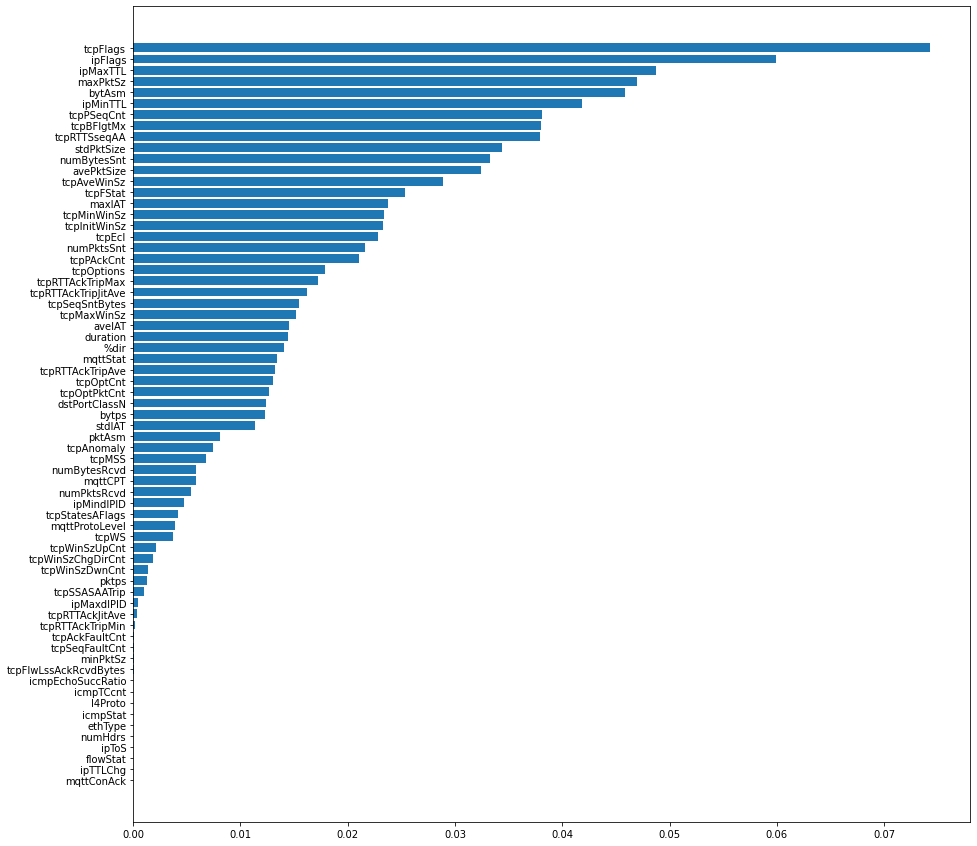

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
plt.barh(main_df_cols[sorted_idx],clf.feature_importances_[sorted_idx])

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

1.029167890548706 seconds
0.9853927498662717 0.9876531215882295 0.9853927498662717 0.7354793096227742
0.9853927498662717 0.9876531215882295 0.9853927498662717 0.9848423879285125
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     26871
           1       0.32      0.03      0.05       302
           2       0.43      0.97      0.59       239
           3       1.00      1.00      1.00     19993
           4       0.84      0.88      0.86       504
           5       0.53      0.90      0.67       362
           6       1.00      0.97      0.98       335

    accuracy                           0.99     48606
   macro avg       0.73      0.82      0.74     48606
weighted avg       0.99      0.99      0.98     48606



In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=100)
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1446.132374048233 seconds
0.9955972513681438 0.9970004896953705 0.9955972513681438 0.8983056353145671
0.9955972513681438 0.9970004896953705 0.9955972513681438 0.9956539598297768
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26871
           1       0.94      0.53      0.67       302
           2       0.56      0.98      0.71       239
           3       1.00      1.00      1.00     19993
           4       0.96      0.94      0.95       504
           5       0.99      0.91      0.95       362
           6       1.00      0.99      1.00       335

    accuracy                           1.00     48606
   macro avg       0.92      0.91      0.90     48606
weighted avg       1.00      1.00      1.00     48606



In [33]:
from xgboost import XGBClassifier
clf = XGBClassifier()
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

1098.3741800785065 seconds
0.9968316668724025 0.9972992814753144 0.9968316668724025 0.9274109084722918
0.9968316668724025 0.9972992814753144 0.9968316668724025 0.9969527042196976
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26871
           1       0.85      0.77      0.81       302
           2       0.67      0.90      0.76       239
           3       1.00      1.00      1.00     19993
           4       0.99      0.94      0.97       504
           5       0.99      0.91      0.95       362
           6       1.00      1.00      1.00       335

    accuracy                           1.00     48606
   macro avg       0.93      0.93      0.93     48606
weighted avg       1.00      1.00      1.00     48606



In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1,gamma='auto')
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))